<div style="width: 38.5%;">
    <p><strong>City College of San Francisco</strong><p>
    <hr>
    <p>MATH 108 - Foundations of Data Science</p>
</div>

# Lecture 26: The Normal Curve

Associated Textbook Sections: [14.3, 14.4](https://inferentialthinking.com/chapters/14/3/SD_and_the_Normal_Curve.html)

<h2>Set Up the Notebook<h2>

In [1]:
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Lecture-26:-The-Normal-Curve" data-toc-modified-id="Lecture-26:-The-Normal-Curve-1">Lecture 26: The Normal Curve</a></span><ul class="toc-item"><li><span><a href="#Set-Up-the-Notebook" data-toc-modified-id="Set-Up-the-Notebook-1.1">Set Up the Notebook</a></span></li><li><span><a href="#" data-toc-modified-id="-1.2"></a></span></li><li><span><a href="#Chebyshev's-Inequality" data-toc-modified-id="Chebyshev's-Inequality-1.3">Chebyshev's Inequality</a></span><ul class="toc-item"><li><span><a href="#How-Big-are-Most-of-the-Values?" data-toc-modified-id="How-Big-are-Most-of-the-Values?-1.3.1">How Big are Most of the Values?</a></span></li><li><span><a href="#Chebyshev's-Bounds" data-toc-modified-id="Chebyshev's-Bounds-1.3.2">Chebyshev's Bounds</a></span></li><li><span><a href="#Demo:-Chebyshev's-Bound" data-toc-modified-id="Demo:-Chebyshev's-Bound-1.3.3">Demo: Chebyshev's Bound</a></span></li><li><span><a href="#Standard-Units" data-toc-modified-id="Standard-Units-1.3.4">Standard Units</a></span></li><li><span><a href="#Demo:-Standard-Units" data-toc-modified-id="Demo:-Standard-Units-1.3.5">Demo: Standard Units</a></span></li><li><span><a href="#The-SD-and-the-Histogram" data-toc-modified-id="The-SD-and-the-Histogram-1.3.6">The SD and the Histogram</a></span></li><li><span><a href="#The-SD-and-Bell-Shaped-Curves" data-toc-modified-id="The-SD-and-Bell-Shaped-Curves-1.3.7">The SD and Bell-Shaped Curves</a></span></li><li><span><a href="#Demo:-The-SD-and-Bell-Shaped-Curves" data-toc-modified-id="Demo:-The-SD-and-Bell-Shaped-Curves-1.3.8">Demo: The SD and Bell Shaped Curves</a></span></li><li><span><a href="#Point-of-Inflection" data-toc-modified-id="Point-of-Inflection-1.3.9">Point of Inflection</a></span></li></ul></li><li><span><a href="#The-Normal-Distribution" data-toc-modified-id="The-Normal-Distribution-1.4">The Normal Distribution</a></span><ul class="toc-item"><li><span><a href="#Bell-Curve(s)" data-toc-modified-id="Bell-Curve(s)-1.4.1">Bell Curve(s)</a></span></li></ul></li><li><span><a href="#Normal-Proportions" data-toc-modified-id="Normal-Proportions-1.5">Normal Proportions</a></span><ul class="toc-item"><li><span><a href="#How-Big-are-Most-of-the-Values?" data-toc-modified-id="How-Big-are-Most-of-the-Values?-1.5.1">How Big are Most of the Values?</a></span></li><li><span><a href="#Bounds-and-Normal-Approximations" data-toc-modified-id="Bounds-and-Normal-Approximations-1.5.2">Bounds and Normal Approximations</a></span></li><li><span><a href="#A-&quot;Central&quot;-Area" data-toc-modified-id="A-&quot;Central&quot;-Area-1.5.3">A "Central" Area</a></span></li></ul></li></ul></li></ul></div>

## Chebyshev's Inequality

### How Big are Most of the Values?

* No matter what the shape of the distribution, the bulk of the data are in the range "average ± a few SDs"
* Chebyshev’s Inequality
    * No matter what the shape of the distribution, the proportion of values in the range "average ± $z$ SDs" is at least $1 - 1/z^2$



### Chebyshev's Bounds


No matter what the distribution looks like, the proportion of data values follows:
<img src="img/lec26_cheby_bounds.png" width=50%>

### Demo: Chebyshev's Bound

Explore a demonstration of Chebyshev's bounds through a data set.

In [2]:
births = Table.read_table('baby.csv')
births.show(3)

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True


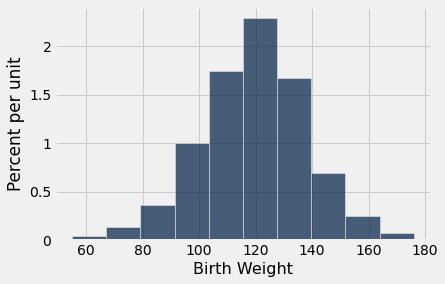

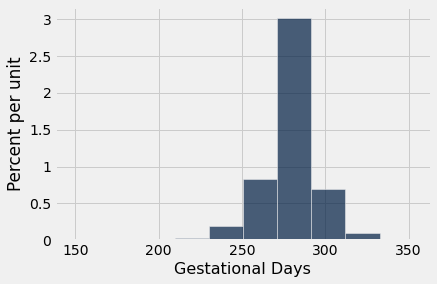

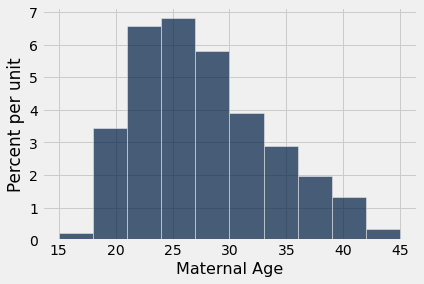

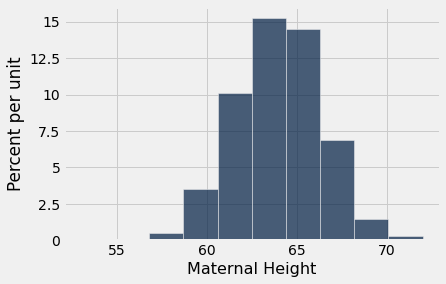

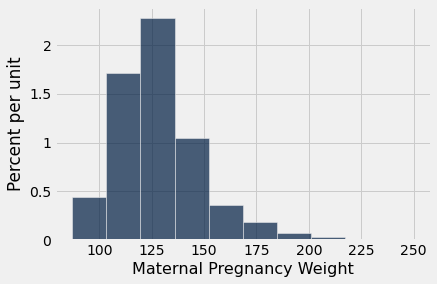

In [3]:
for i in np.arange(5):
    births.hist(i)

In [4]:
mpw = births.column('Maternal Pregnancy Weight')
mean = np.mean(mpw)
sd = np.std(mpw)
mean, sd

(128.4787052810903, 20.72544970428041)

In [5]:
within_3_SDs = births.where('Maternal Pregnancy Weight', are.between(mean - 3*sd, mean + 3*sd))

In [6]:
# Proportion within 3 SDs of the mean

within_3_SDs.num_rows / births.num_rows

0.9863713798977853

In [7]:
# Chebyshev's bound: 
# The proportion we calculated above should be at least

1 - 1/(3**2)

0.8888888888888888

In [8]:
births.labels

('Birth Weight',
 'Gestational Days',
 'Maternal Age',
 'Maternal Height',
 'Maternal Pregnancy Weight',
 'Maternal Smoker')

In [9]:
# See if Chebyshev's bounds work for distributions with various shapes

for feature in births.labels:
    values = births.column(feature)
    mean = np.mean(values)
    sd = np.std(values)
    print()
    print(feature)
    for z in make_array(2, 3, 4, 5):
        chosen = births.where(feature, are.between(mean - z*sd, mean + z*sd))
        proportion = chosen.num_rows / births.num_rows
        percent = round(proportion * 100, 2)
        print('Average plus or minus', z, 'SDs:', percent, '% of the data')


Birth Weight
Average plus or minus 2 SDs: 94.89 % of the data
Average plus or minus 3 SDs: 99.57 % of the data
Average plus or minus 4 SDs: 100.0 % of the data
Average plus or minus 5 SDs: 100.0 % of the data

Gestational Days
Average plus or minus 2 SDs: 93.78 % of the data
Average plus or minus 3 SDs: 98.64 % of the data
Average plus or minus 4 SDs: 99.57 % of the data
Average plus or minus 5 SDs: 99.83 % of the data

Maternal Age
Average plus or minus 2 SDs: 94.89 % of the data
Average plus or minus 3 SDs: 99.91 % of the data
Average plus or minus 4 SDs: 100.0 % of the data
Average plus or minus 5 SDs: 100.0 % of the data

Maternal Height
Average plus or minus 2 SDs: 97.19 % of the data
Average plus or minus 3 SDs: 99.66 % of the data
Average plus or minus 4 SDs: 99.91 % of the data
Average plus or minus 5 SDs: 100.0 % of the data

Maternal Pregnancy Weight
Average plus or minus 2 SDs: 95.06 % of the data
Average plus or minus 3 SDs: 98.64 % of the data
Average plus or minus 4 SDs:

### Standard Units

* How many SDs above average?
* `z = (value - average)/SD`
    * Negative z: value below average
    * Positive z: value above average
    * z = 0: value equal to average
* When values are in standard units: average = 0, SD = 1
* Gives us a way to compare/understand data no matter what the original units


### Demo: Standard Units

Create a function to convert a measurement to standard units and apply it to the previous data set.

In [10]:
def standard_units(x):
    """Convert array x to standard units."""
    return (x - np.mean(x)) / np.std(x)

In [11]:
ages = births.column('Maternal Age')

In [12]:
ages_standard_units = standard_units(ages)

In [13]:
np.mean(ages_standard_units), np.std(ages_standard_units)

(-7.868020072300939e-17, 1.0)

In [14]:
both = Table().with_columns(
    'Age in Years', ages,
    'Age in Standard Units', ages_standard_units
)
both

Age in Years,Age in Standard Units
27,-0.0392546
33,0.992496
28,0.132704
23,-0.727088
25,-0.383171
33,0.992496
23,-0.727088
25,-0.383171
30,0.476621
27,-0.0392546


In [15]:
np.mean(ages), np.std(ages)

(27.228279386712096, 5.815360404190897)

Compare the distribution of values and standardized values.

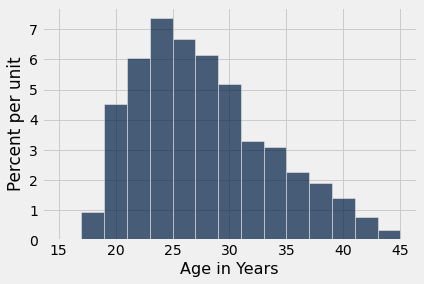

In [16]:
both.hist('Age in Years', bins = np.arange(15, 46, 2))

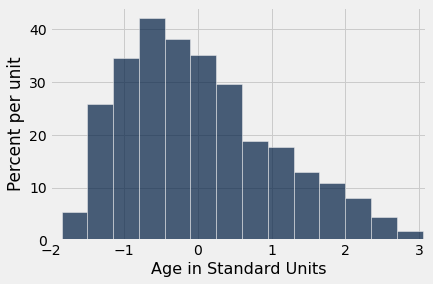

In [17]:
both.hist('Age in Standard Units', bins = np.arange(-2.2, 3.4, 0.35))
plots.xlim(-2, 3.1);

### The SD and the Histogram

* Usually, it's not easy to estimate the SD by looking at a histogram.
* But if the histogram has a bell shape, then you can.


### The SD and Bell-Shaped Curves

If a histogram is bell-shaped, then
* the average is at the center
* the SD is the distance between the average and the points of inflection on either side


### Demo: The SD and Bell Shaped Curves

Notice the way the distribution changes around $\pm 1$ of the mean.

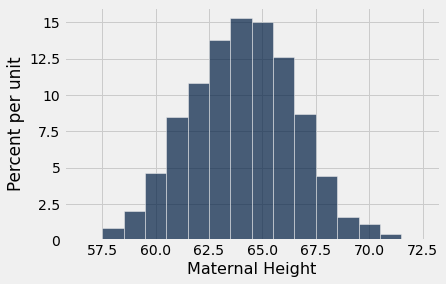

In [18]:
births.hist('Maternal Height', bins = np.arange(56.5, 72.6, 1))

In [19]:
heights = births.column('Maternal Height')
np.mean(heights), np.std(heights)

(64.04940374787053, 2.5250254409674375)

In [20]:
np.mean(heights) + np.std(heights), np.mean(heights) - np.std(heights)

(66.57442918883797, 61.52437830690309)

### Point of Inflection

<img src="img/lec26_inflection_points.png" width =50%>

## The Normal Distribution

### Bell Curve(s)

There are many, many, many normal curves!
<img src="img/lec26_normal_curves.png" width=50%>

## Normal Proportions

### How Big are Most of the Values?

* No matter what the shape of the distribution, the bulk of the data are in the range "average ± a few SDs"
* If a histogram is bell-shaped, then almost all of the data are in the range "average ± 3 SDs"


### Bounds and Normal Approximations

<img src="img/lec26_normal_bounds.png" width = 50%>

### A "Central" Area

<img src="img/lec26_central_area.png" width = 50%>

<footer>
    <hr>
    <p>Adopted from UC Berkeley DATA 8 course materials.</p>
    <p>This content is offered under a <a href="https://creativecommons.org/licenses/by-nc-sa/4.0/">CC Attribution Non-Commercial Share Alike</a> license.</p>
</footer>